In [6]:
import components as c
import numpy as np
import matplotlib.pyplot as plt
aaf = c.AntiAliasingFilter(cutoff=0.1, order=2, fs=1)

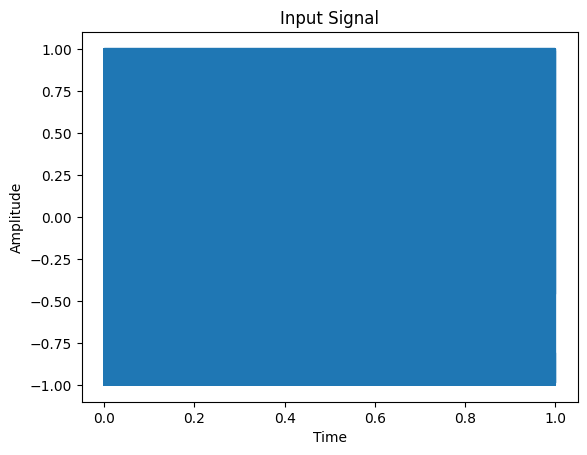

In [12]:
t = np.linspace(0, 1, 100000, endpoint=False)
freq = 7.5e3
input_signal = np.sin(2 * np.pi * freq * t)

plt.plot(t, input_signal)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Input Signal')
plt.show()


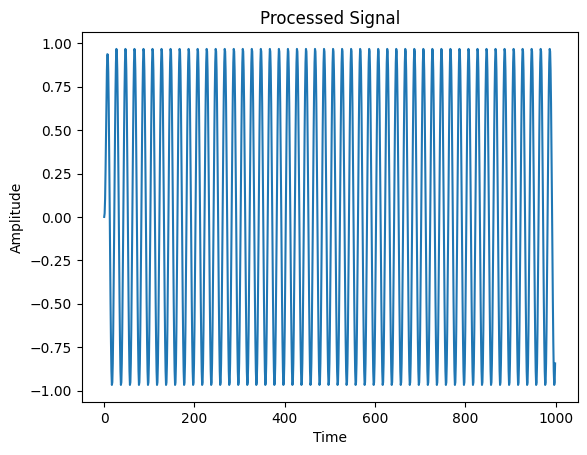

In [8]:

processed_signal = aaf.process(input_signal)
plt.plot(processed_signal)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Processed Signal')
plt.show()
